# STEP2: import libraries

In [ ]:
# Data handling
import numpy as np
import pandas as pd

# Text processing
import re
import string

# Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# STEP3: load and preprocess data

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import requests
import zipfile
import io

# URL for the sentiment140 dataset (training data)
# The dataset typically contains 6 fields: target, ids, date, flag, user, text
DATASET_URL = "http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"

# Download the zip file
response = requests.get(DATASET_URL)
response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

# Unzip the content and read the desired CSV file
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # Assuming 'training.1600000.processed.noemoticon.csv' is the desired file
    with z.open('training.1600000.processed.noemoticon.csv') as f:
        df = pd.read_csv(f, encoding='ISO-8859-1', engine='python', header=None)

df.columns = ['sentiment', 'id', 'date', 'flag', 'user', 'review']

# Select relevant columns
df = df[['review', 'sentiment']]

# Convert sentiment to binary (0 = negative, 1 = positive)
# Original sentiment: 0 = negative, 2 = neutral, 4 = positive
df['sentiment'] = df['sentiment'].astype(int)
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 4 else 0)

# Use smaller subset for faster training
df = df.sample(5000, random_state=42).reset_index(drop=True)
df.head()

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\S+", "", text)   # Remove mentions
    text = re.sub(r"#\S+", "", text)   # Remove hashtags
    text = re.sub(r"\d+", "", text)    # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation)) # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words] # Remove stopwords
    return " ".join(words)

df['clean_review'] = df['review'].apply(clean_text)

df[['review','clean_review']].head()

,review,clean_review
0,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh hope ok
1,"@misstoriblack cool , i have no tweet apps fo...",cool tweet apps razr
2,@TiannaChaos i know just family drama. its la...,know family drama lamehey next time u hang kim...
3,School email won't open and I have geography ...,school email wont open geography stuff revise ...
4,upper airways problem,upper airways problem


# STEP4: feature extraction

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment']

print("Vocabulary Size:", len(vectorizer.vocabulary_))

Vocabulary Size: 5000


# STEP5: TRAIN LOGISTIC REGRESSION MODEL

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' solver for smaller datasets
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.699
Precision: 0.6970873786407767
Recall: 0.7123015873015873
F1 Score: 0.704612365063788


# STEP6: MODEL EVALUATION

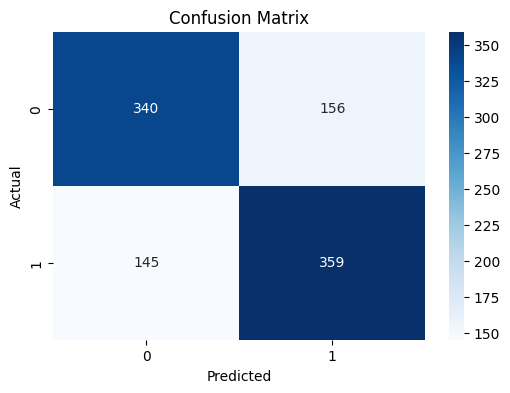

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Naive Bayes Accuracy: 0.703


# STEP7: ANALYSIS

Model Comparison: Logistic Regression vs. Naive Bayes
1. Model Type:

Logistic Regression: Is a discriminative model, meaning it directly models the decision boundary between classes.
Naive Bayes: Is a probabilistic generative model, which models the distribution of each class and then uses Bayes' theorem to classify new data points.
2. Feature Assumptions:

Logistic Regression: Does not assume feature independence, allowing it to capture more complex relationships between features.
Naive Bayes: Assumes conditional independence of features given the class, which is a strong assumption (hence 'naive') but simplifies computation.
3. Performance with Data Size:

Logistic Regression: Usually performs better with large datasets, as it can learn more complex patterns without overfitting due to its discriminative nature.
Naive Bayes: Works well with small datasets, as its strong independence assumption can lead to stable estimates even with limited data.
4. Training Speed:

Naive Bayes: Generally trains faster due to its simpler probability calculations.
Logistic Regression: Can take longer to train, especially with very large datasets or complex feature interactions, as it iteratively optimizes coefficients.
5. Interpretability:

Logistic Regression: Provides coefficient interpretation, where the magnitude and sign of coefficients can indicate the importance and direction of a feature's influence on the outcome.
6. Decision Boundary:

Logistic Regression: Tends to give a better decision boundary, especially when features are correlated.
7. Impact of TF-IDF:

TF-IDF: Improves both models by effectively weighting word importance in the text, helping both models to better distinguish between positive and negative sentiments.
In our current task, the Naive Bayes model showed a slightly higher accuracy (0.703) compared to Logistic Regression (0.699). This could be due to the dataset size or the specific characteristics of the text data.